In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data_heart.csv")

In [31]:
#Check the dataset
#df.head()
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
#Check the number of data
df.shape

(299, 13)

In [10]:
#Check if there is missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

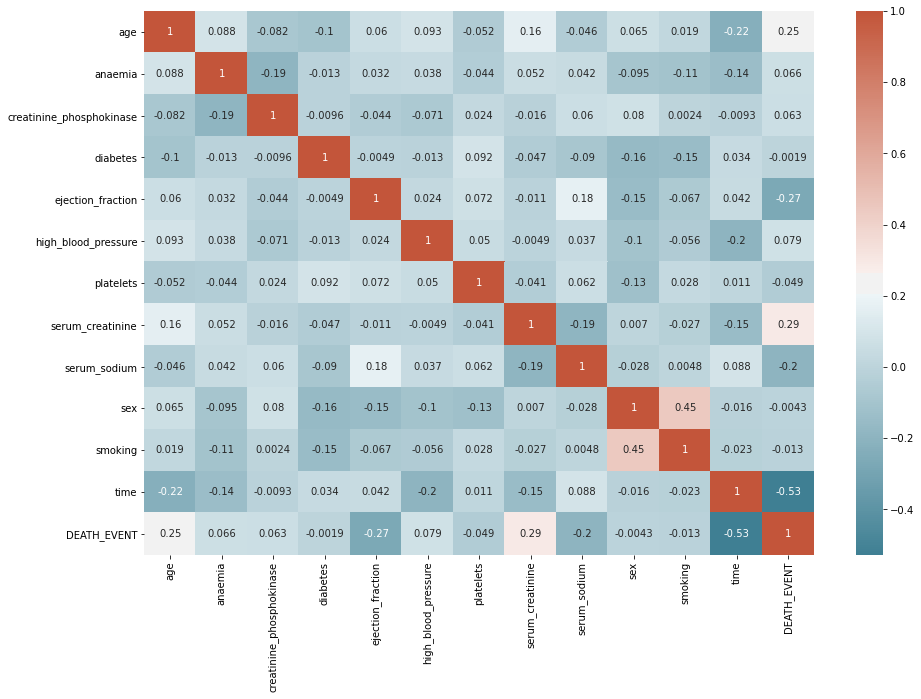

In [14]:
#Find correlation and visualize with a seaborn heatmap
cor = df.corr();
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [17]:
#Create classification and separate features and targets

X = df.drop(["DEATH_EVENT"], axis = 1)
y = df["DEATH_EVENT"]

In [19]:
#Count the number of death events
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [20]:
#Standardizing features to prevent bias
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [32]:
#Spliting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 1)

In [33]:
#Importing RFC 
from sklearn.ensemble import RandomForestClassifier 

In [34]:
#Fitting the training data
model = RandomForestClassifier(random_state = 1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [35]:
#Make the prediction
y_pred = model.predict(X_test)

In [37]:
#Checkout Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Precision = TP/(TP + FP) = true postives / predicted positives
#Recall = TP/(TP + FN) = true positives / all positives 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.83      0.75      0.79        20

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75

